# Проект: предсказания победителя в онлайн-игре по первым 5 минутам

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


## EDA

#### 1. Получить и ввести датасет

In [2]:
df = pd.read_csv("features.csv", index_col="match_id")

#### 2. Понять, какая информация содержится в датасете (семантика)

In [3]:
df.shape

(97230, 108)

In [4]:
df.columns

Index(['start_time', 'lobby_type', 'r1_hero', 'r1_level', 'r1_xp', 'r1_gold',
       'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items',
       ...
       'dire_boots_count', 'dire_ward_observer_count',
       'dire_ward_sentry_count', 'dire_first_ward_time', 'duration',
       'radiant_win', 'tower_status_radiant', 'tower_status_dire',
       'barracks_status_radiant', 'barracks_status_dire'],
      dtype='object', length=108)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 108 entries, start_time to barracks_status_dire
dtypes: float64(12), int64(96)
memory usage: 80.9 MB


In [6]:
df.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


In [7]:
df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


#### 3. Пропуски

In [8]:
df[df.columns[pd.isnull(df).sum() > 0]]
#  12 columns из 108 имеют пропуски

,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_first_ward_time
match_id,,,,,,,,,,,,
0,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,35.0,103.0,-84.0,221.0,-52.0
1,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,-20.0,149.0,-84.0,195.0,-5.0
2,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,-39.0,45.0,-77.0,221.0,13.0
3,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,-30.0,124.0,-80.0,184.0,27.0
4,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,46.0,182.0,-80.0,225.0,-16.0
5,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,-27.0,2.0,-86.0,212.0,-43.0
8,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,-35.0,6.0,-86.0,182.0,10.0
9,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,26.0,119.0,-61.0,NaN,-15.0
11,-18.0,1.0,5.0,NaN,77.0,-81.0,180.0,9.0,NaN,-84.0,226.0,26.0


In [9]:
# Обоснование пропусков

# dire_courier_time             - команда dire не купила courier за первые 5мин игры
# radiant_courier_time          - команда radiant не купила courier за первые 5мин игры

# dire_first_ward_time          - команда dire не купила ward за первые 5мин игры
# radiant_first_ward_time       - команда radiant не купила ward за первые 5мин игры

# radiant_bottle_time           - команда dire не купила bottle за первые 5мин игры
# dire_bottle_time              - команда radiant не купила bottle за первые 5мин игры

# dire_flying_courier_time      - команда dire не купила flying_courier за первые 5мин игры
# radiant_flying_courier_time   - команда radiant не купила flying_courier за первые 5мин игры

# first_blood_time              - не совершено первое убийство за первые 5мин игры
# first_blood_team              - не совершено первое убийство за первые 5мин игры
# first_blood_player1           - не совершено первое убийство за первые 5мин игры
# first_blood_player2           - первая кровь совершено только одним игроком

In [10]:
# Заполняем пропуски
df["dire_courier_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["radiant_courier_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["dire_first_ward_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["radiant_first_ward_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["radiant_bottle_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["dire_bottle_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["dire_flying_courier_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно
df["radiant_flying_courier_time"].fillna(5*60, inplace=True)  # 5*60 -> купили очень поздно

df["first_blood_time"].fillna(5*60, inplace=True)  # 5*60 -> первое убийство очень поздно
df["first_blood_team"].fillna(value=np.random.randint(2, size=1)[0], inplace=True) # 0или1 - рандомная команда
df["first_blood_player1"].fillna(value=np.random.randint(10, size=1)[0], inplace=True) # 0..9 - рандомный игрок
df["first_blood_player2"].fillna(value=np.random.randint(10, size=1)[0], inplace=True) # 0..9 - рандомный игрок

In [11]:
# Проверка что больше нет пропусков
df[df.columns[pd.isnull(df).sum() > 0]].columns


Index([], dtype='object')

In [12]:
# проверка на дубликаты
df[df.duplicated()]

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,


#### 4. Выбросы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BD66BEBA8>,
      dtype=object)

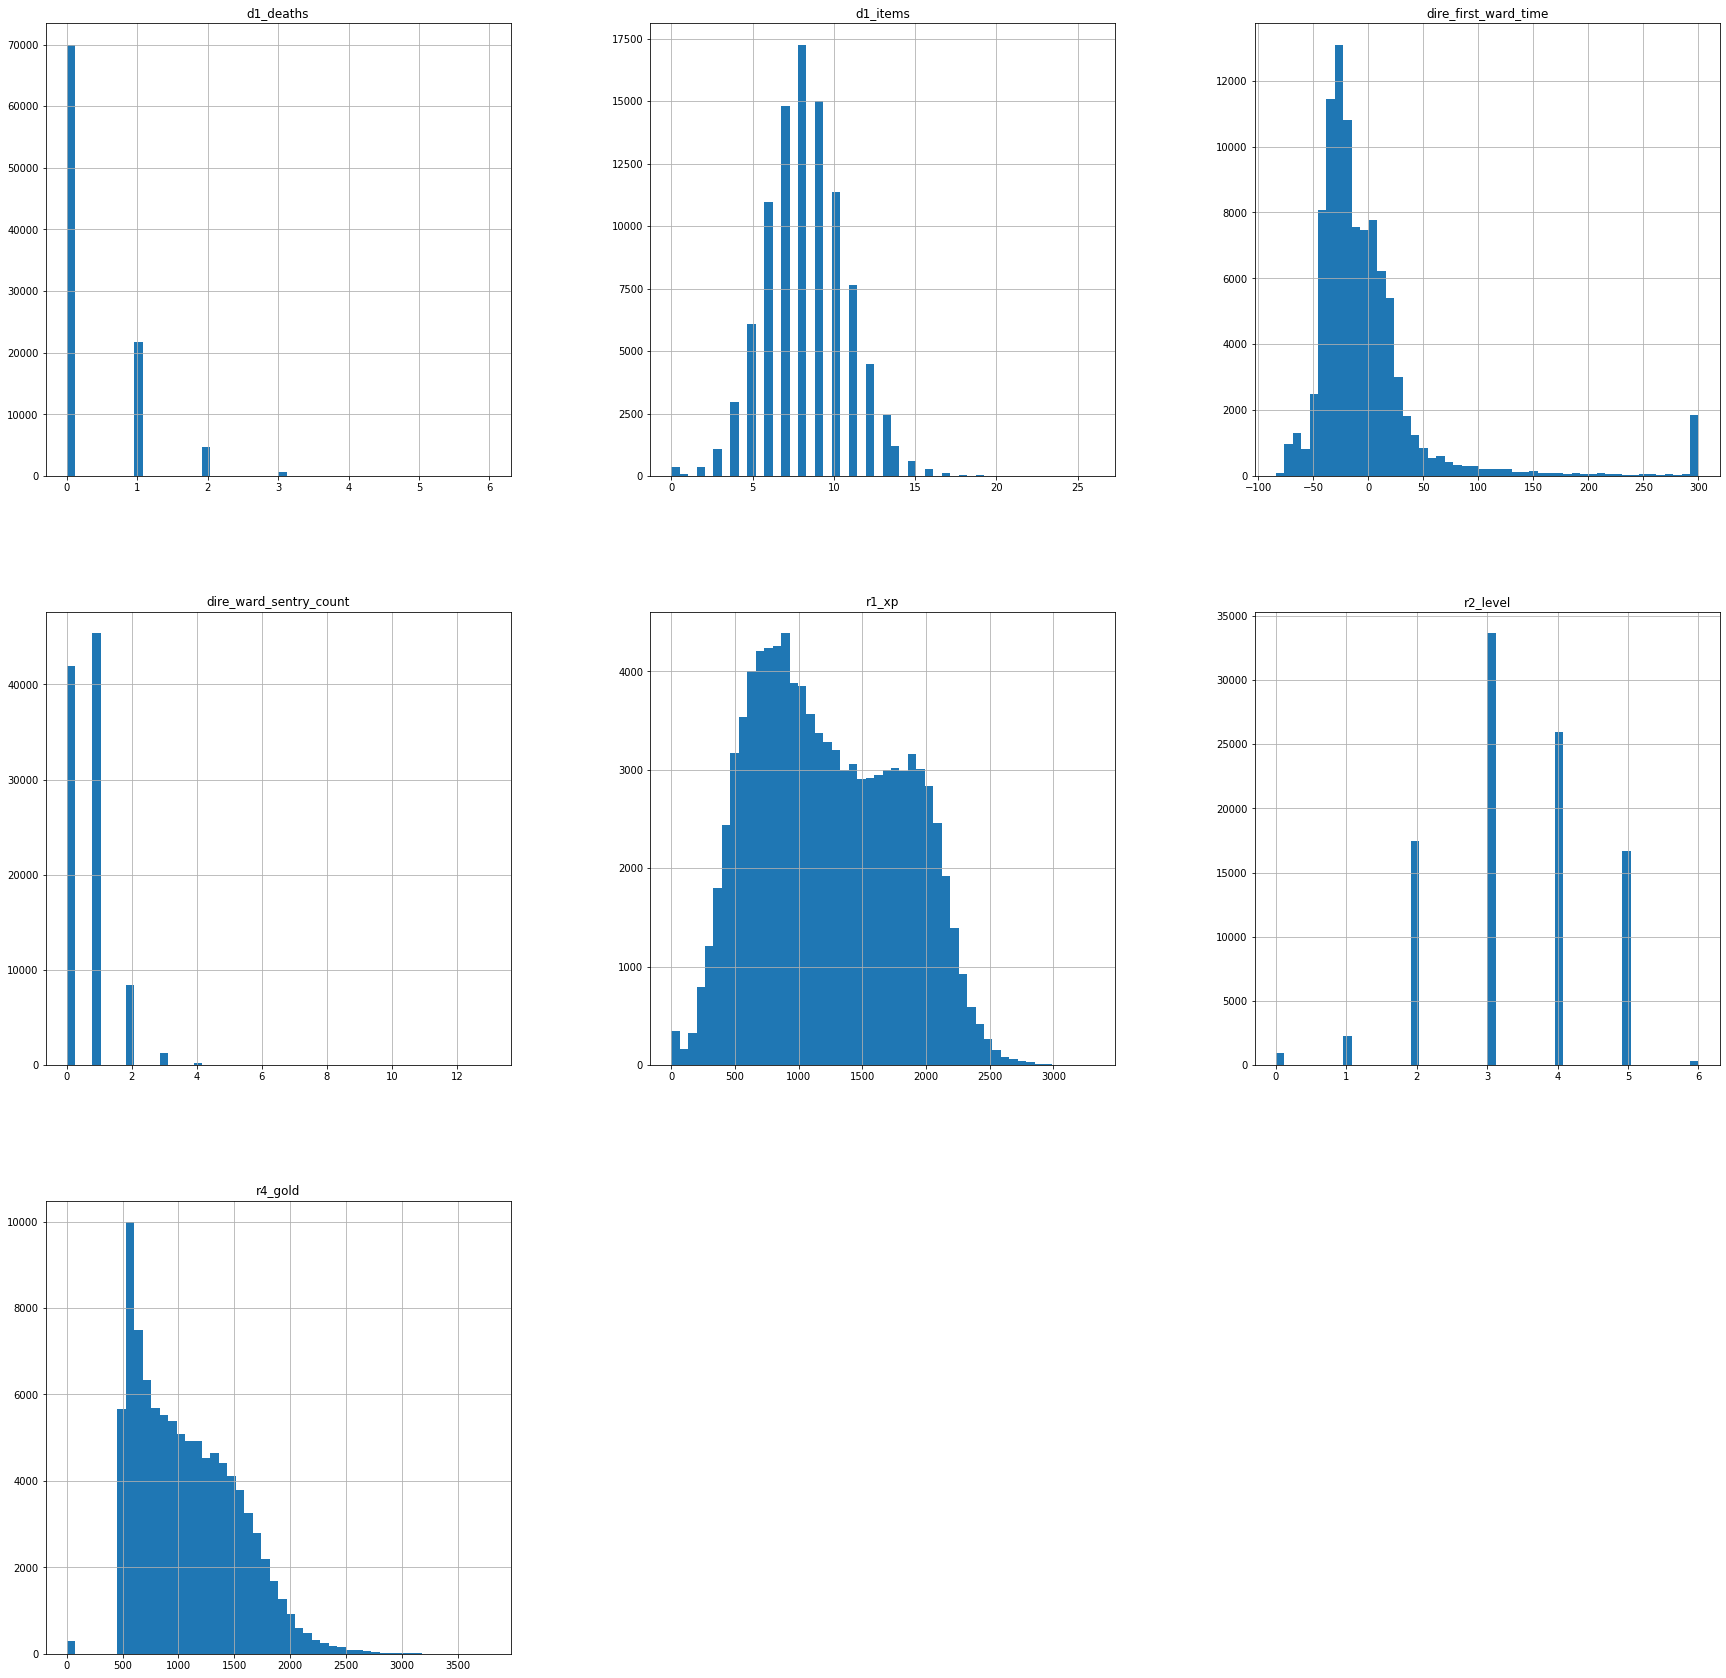

In [13]:
# более интересные колонки
columns = ["r1_xp", "r2_level", "r4_gold", 'd1_deaths', 'd1_items', 'dire_ward_sentry_count', 'dire_first_ward_time']
df[columns].hist(bins=50, figsize=(30,30))

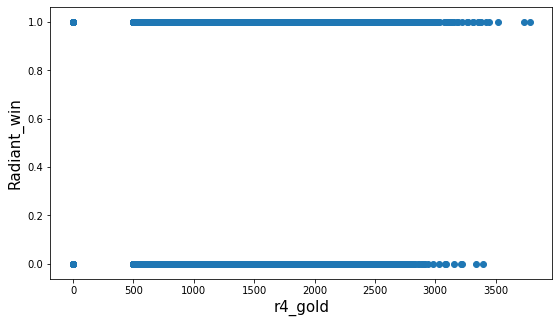

In [14]:
# r4_gold выглядит подзрительно
gig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x=df["r4_gold"], y=df["radiant_win"])
plt.ylabel('Radiant_win', fontsize=15)
plt.xlabel('r4_gold', fontsize=15)
plt.show()

In [15]:
# Для всех колонок где r1_gold (либо r/d, и игрок номер 1...5) - значение 0 очевидно выброс
# заменим их на рандомные значения в пределах всех нормальных значений
np.random.seed(1)

df.loc[df["r1_gold"] == 0, "r1_gold"] = np.random.randint(500,  3000, size=df["r1_gold"][df["r1_gold"] == 0].size)
df.loc[df["r2_gold"] == 0, "r2_gold"] = np.random.randint(500,  3000, size=df["r2_gold"][df["r2_gold"] == 0].size)
df.loc[df["r3_gold"] == 0, "r3_gold"] = np.random.randint(500,  3000, size=df["r3_gold"][df["r3_gold"] == 0].size)
df.loc[df["r4_gold"] == 0, "r4_gold"] = np.random.randint(500,  3000, size=df["r4_gold"][df["r4_gold"] == 0].size)
df.loc[df["r5_gold"] == 0, "r5_gold"] = np.random.randint(500,  3000, size=df["r5_gold"][df["r5_gold"] == 0].size)

df.loc[df["d1_gold"] == 0, "d1_gold"] = np.random.randint(500,  3000, size=df["d1_gold"][df["d1_gold"] == 0].size)
df.loc[df["d2_gold"] == 0, "d2_gold"] = np.random.randint(500,  3000, size=df["d2_gold"][df["d2_gold"] == 0].size)
df.loc[df["d3_gold"] == 0, "d3_gold"] = np.random.randint(500,  3000, size=df["d3_gold"][df["d3_gold"] == 0].size)
df.loc[df["d4_gold"] == 0, "d4_gold"] = np.random.randint(500,  3000, size=df["d4_gold"][df["d4_gold"] == 0].size)
df.loc[df["d5_gold"] == 0, "d5_gold"] = np.random.randint(500,  3000, size=df["d5_gold"][df["d5_gold"] == 0].size)

In [16]:
df["r2_gold"][df["r2_gold"] == 0]

Series([], Name: r2_gold, dtype: int64)

#### 5. Некоторые статистические данные

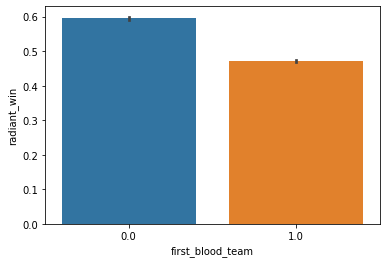

In [17]:
# Победили ли Radiant от first_blood_team
sns.barplot(x='first_blood_team', y='radiant_win', data=df)
#  0 - radiant. 1- dire

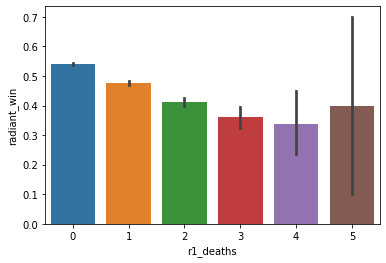

In [18]:
# Победили ли Radiant от количества смертей первого игрока
sns.barplot(x='r1_deaths', y='radiant_win', data=df)

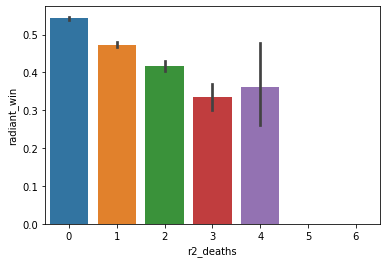

In [19]:
# Победили ли Radiant от количества смертей второго игрока
sns.barplot(x='r2_deaths', y='radiant_win', data=df)

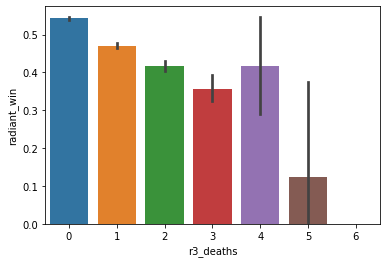

In [20]:
# Победили ли Radiant от количества смертей третьего игрока
sns.barplot(x='r3_deaths', y='radiant_win', data=df)

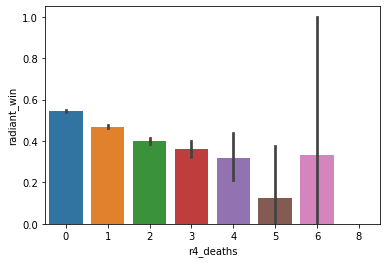

In [21]:
# Победили ли Radiant от количества смертей четвертого игрока
sns.barplot(x='r4_deaths', y='radiant_win', data=df)

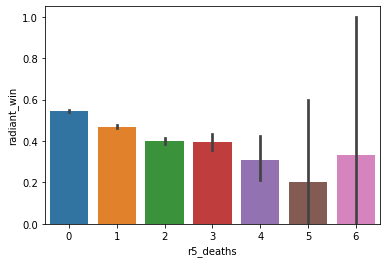

In [22]:
# Победили ли Radiant от количества смертей пятого игрока
sns.barplot(x='r5_deaths', y='radiant_win', data=df)

#### 6. Категориальные значения

In [23]:
# Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero

# создадним для lobby_type фиктивную переменную за категориальное значение (добавили 3 столбца lobby_type_0 /1 /7)
df = pd.get_dummies(df, columns=['lobby_type'])

# удалим остальные, которые соответствуют выбранным героям
df = df.drop(['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)


#### 7. Существенные переменные

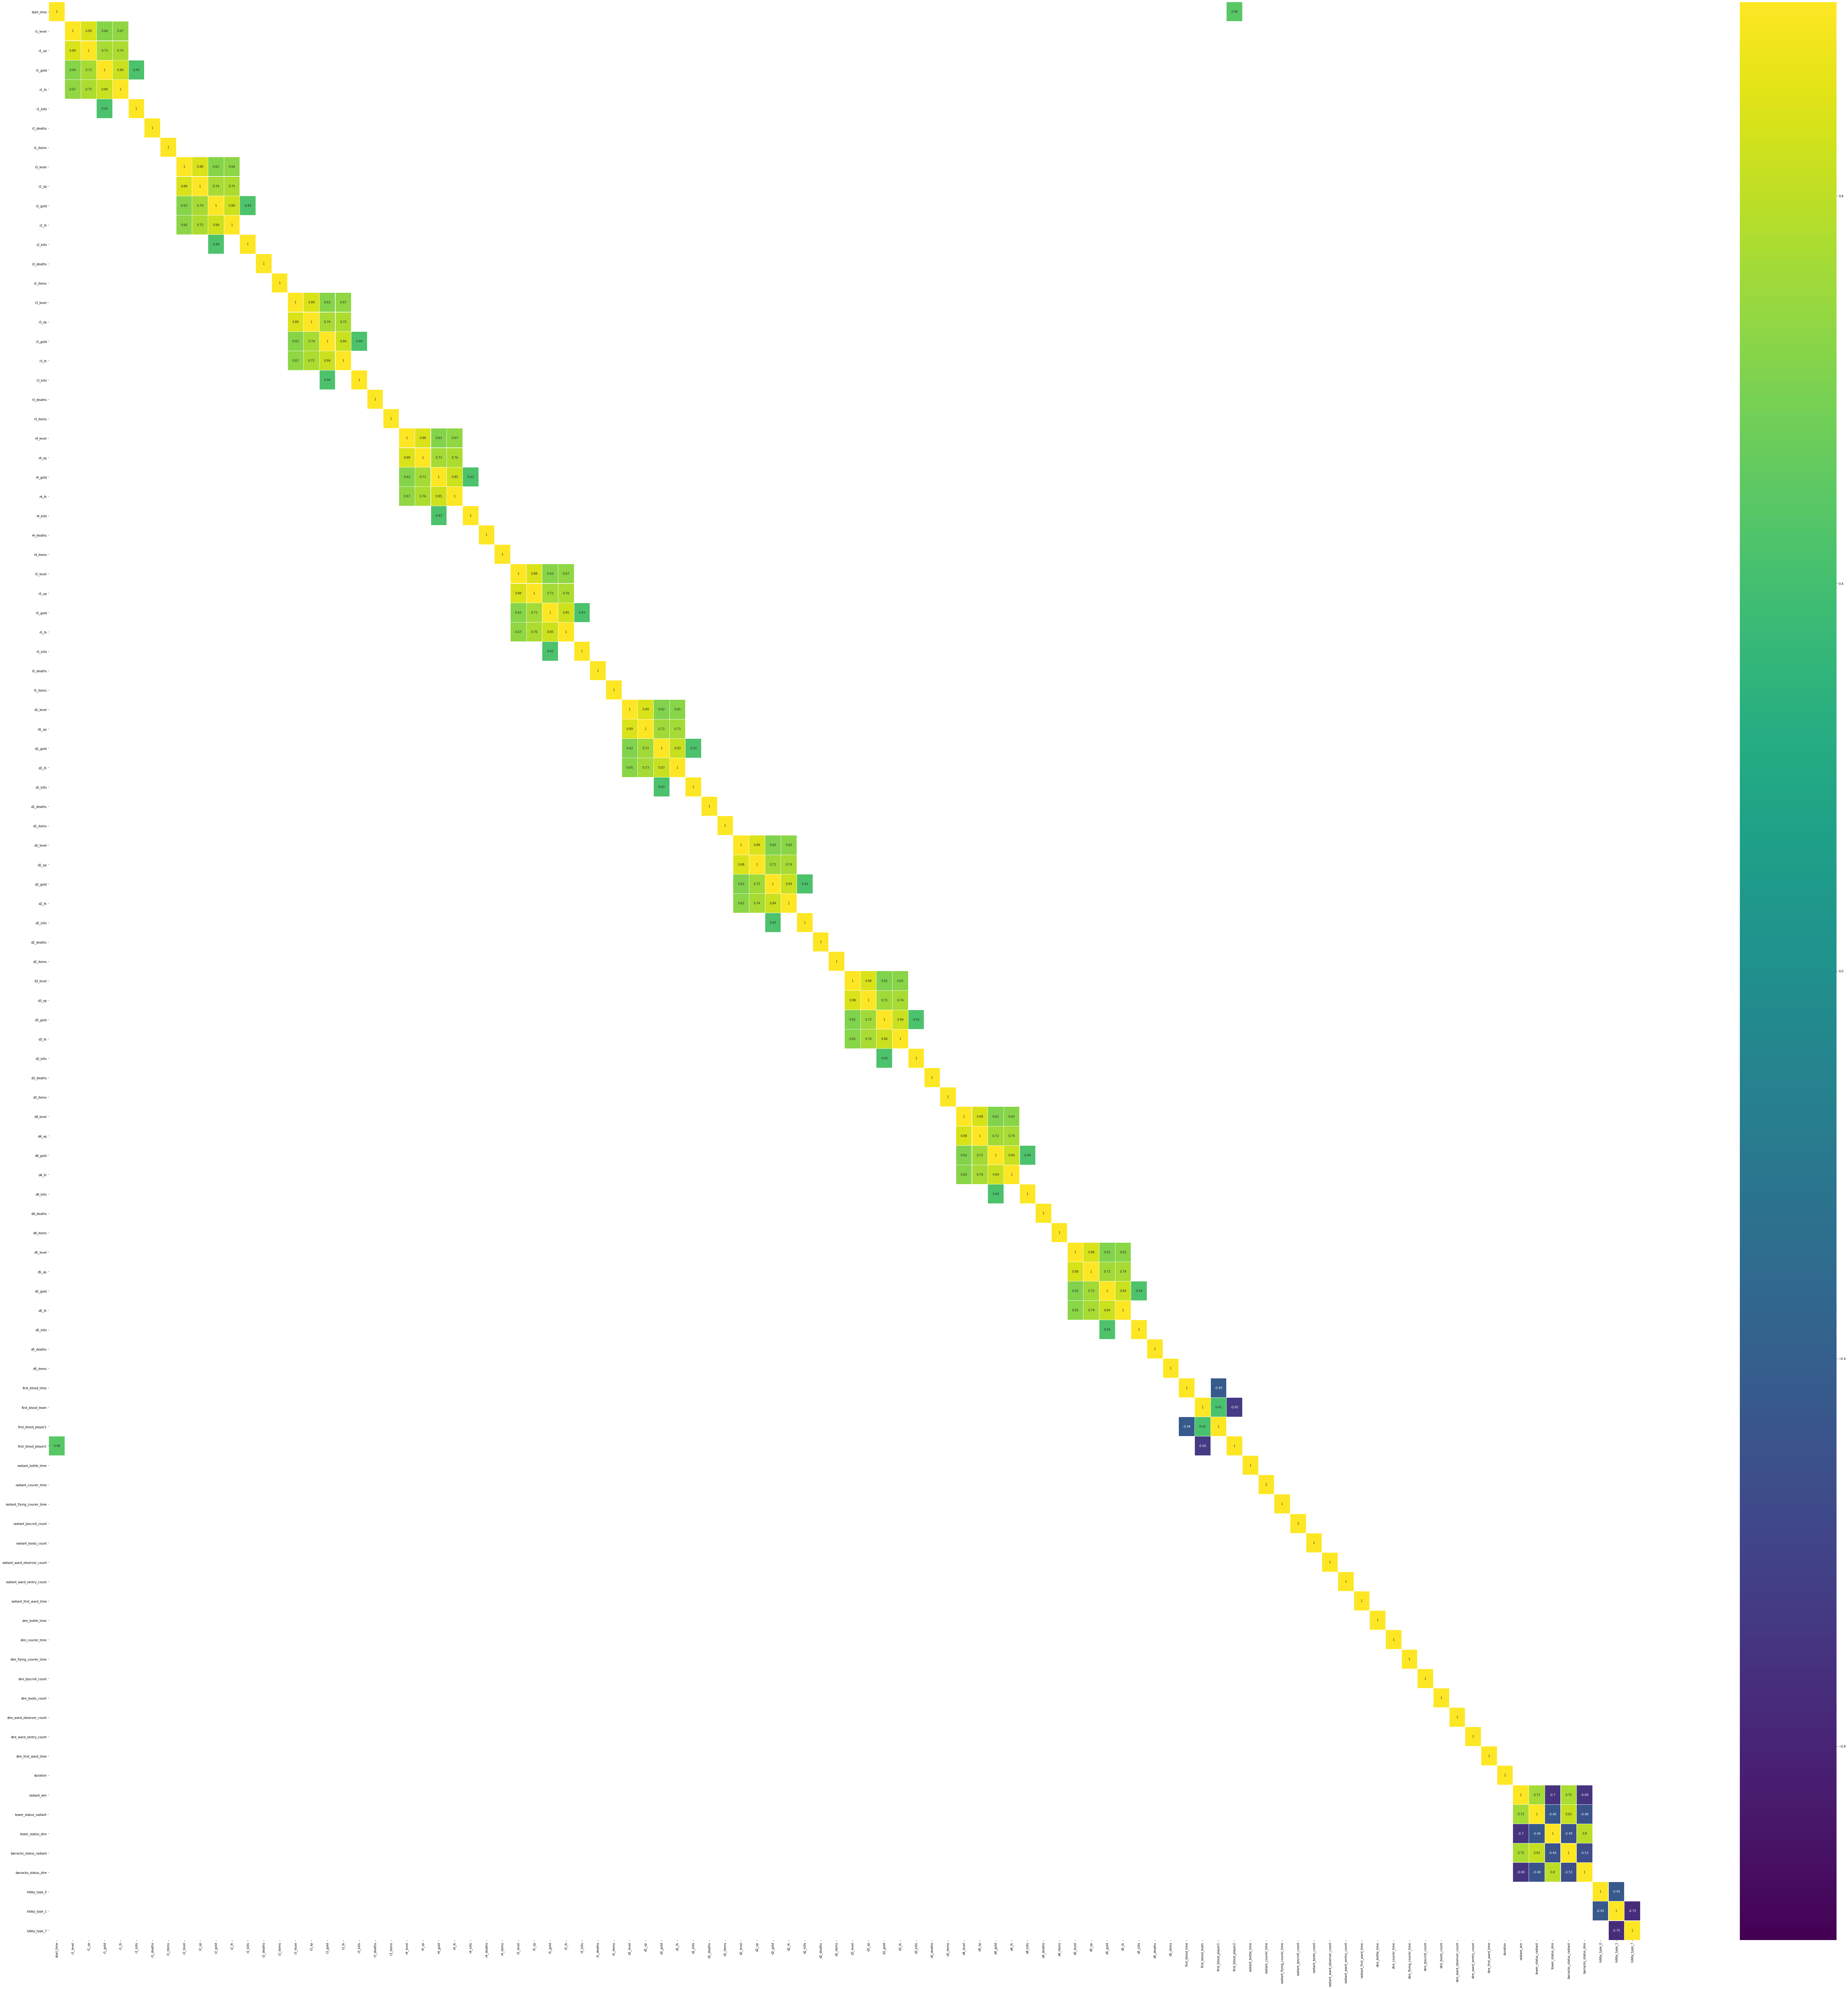

In [24]:
# Посмотрим корреляцию данных
corrmat = df.corr();
plt.subplots(figsize=(118,118));                
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat <= -0.4)],
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True
            );

In [25]:
# Отберем имена коррелирующих данных
corrmat[((corrmat >= 0.7) | (corrmat <= -0.7)) & (corrmat != 1)].dropna(how="all").index

Index(['r1_level', 'r1_xp', 'r1_gold', 'r1_lh', 'r2_level', 'r2_xp', 'r2_gold',
       'r2_lh', 'r3_level', 'r3_xp', 'r3_gold', 'r3_lh', 'r4_level', 'r4_xp',
       'r4_gold', 'r4_lh', 'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'd1_level',
       'd1_xp', 'd1_gold', 'd1_lh', 'd2_level', 'd2_xp', 'd2_gold', 'd2_lh',
       'd3_level', 'd3_xp', 'd3_gold', 'd3_lh', 'd4_level', 'd4_xp', 'd4_gold',
       'd4_lh', 'd5_level', 'd5_xp', 'd5_gold', 'd5_lh', 'radiant_win',
       'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant',
       'barracks_status_dire', 'lobby_type_1', 'lobby_type_7'],
      dtype='object')

In [26]:
# Удалим столбцы, связанные с итогами матча
df.drop(["duration", "tower_status_radiant", "tower_status_dire", "barracks_status_radiant", "barracks_status_dire"], axis=1, inplace=True)

In [27]:
# Целвая переменная radiant_win
X_train = df.drop("radiant_win", axis=1)[:80000]
y_train = df["radiant_win"][:80000]

X_test = df.drop("radiant_win", axis=1)[80000:]
y_test = df["radiant_win"][80000:]

## Модели

In [44]:
# Тестовые данные без ответов
X_test_final = pd.read_csv("features_test.csv", index_col="match_id")
X_test_final.fillna(0, inplace=True)
# Повторим разбиение по колонкам для тестовой выборки
X_test_final = pd.get_dummies(X_test_final, columns=['lobby_type'])
X_test_final = X_test_final.drop(['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)

X_test_final.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,lobby_type_0,lobby_type_1,lobby_type_7
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,4,1103,1089,8,0,1,9,3,1183,...,-86.0,272.0,3,4,2,0,118.0,1,0,0
7,1430293357,2,556,570,1,0,0,9,4,1194,...,-54.0,0.0,3,2,2,1,16.0,0,1,0
10,1430301774,2,751,808,1,0,0,13,2,421,...,-87.0,186.0,1,3,3,0,-34.0,0,1,0
13,1430323933,3,708,903,1,1,1,11,2,672,...,-89.0,210.0,3,4,2,1,-26.0,0,1,0
16,1430331112,4,1259,661,4,0,0,9,5,1703,...,-86.0,180.0,1,3,2,1,-33.0,0,1,0


In [53]:
# Функция для вывода трех гистограмм:
# предсказания для тренировочной выборки, тестовой выборки с ответами и для тестовой выборки без ответов
def print_compare_hists(model, X__train, y__train, X__test, y__test, X__test__Final):
    plt.figure(figsize=(15,5))
    
    # гистограмма на обученных данных - синий
    plt.subplot(1, 3, 1)
    plt.title('Тренировочная выборка')
    plt.xlabel('radiant_win')
    plt.ylabel('колич. матчей')
    predict = model.predict(X__train[:])
    plt.hist(predict, alpha=0.5, label='Предсказанные') 
    plt.hist(y__train.iloc[:], alpha=0.5, label='Действительные') # добавим действительные данные - желтый
    plt.legend(loc='best')
    
    # проверим на тестовых данных с ответами
    plt.subplot(1, 3, 2)
    plt.title('Тестовая выборка с ответами')
    plt.xlabel('radiant_win')
    plt.ylabel('колич. матчей')
    predict = model.predict((X__test.iloc[:]))
    plt.hist(predict, label='Предсказанные')
    plt.hist(y__test.iloc[:], alpha=0.5, label='Действительные') # добавим действительные данные - желтый
    plt.legend(loc='best')

    # проверим на тестовых данных
    plt.subplot(1, 3, 3)
    plt.title('Тестовая выборка без ответов')
    plt.xlabel('radiant_win')
    plt.ylabel('колич. матчей')
    predict = model.predict((X_test.iloc[:]))
    plt.hist(predict, label='Предсказанные')
    plt.legend(loc='best')

    plt.show()
    
# Функция для вывода гистограммы предсказанных вероятностей
def print_predict_proba_hist(preds):
    print(preds.describe())
    preds.plot.hist(bins=20)

### 1. Логистическая регрессия

In [50]:
logReg = LogisticRegressionCV(Cs=10,  # Cs - обратная сила регуляризации
                             random_state=42,
                             cv=5) 
logReg.fit(X_train, y_train)
logReg.score(X_test, y_test)

0.6532791642484039

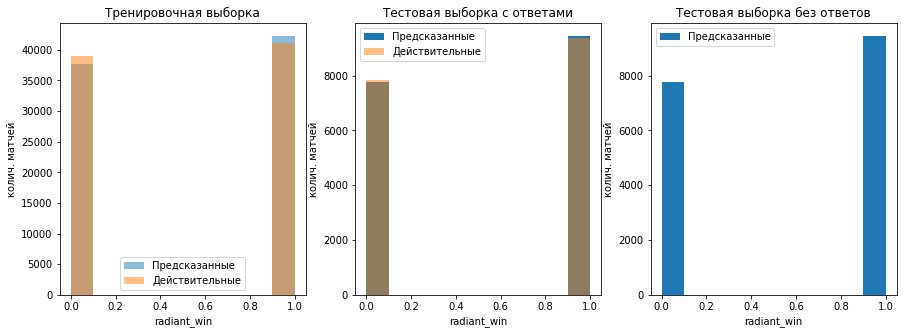

In [51]:
# сравнительные гистограммы работы модели
print_compare_hists(logReg, X_train, y_train, X_test, y_test, X_test_final)

count    17230.000000
mean         0.523453
std          0.181485
min          0.002357
25%          0.390349
50%          0.525285
75%          0.658900
max          0.982486
dtype: float64


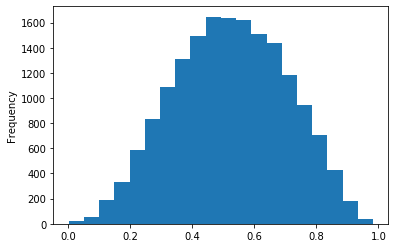

In [54]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(logReg.predict_proba(X_test)[:,1])
print_predict_proba_hist(series)

count    17177.000000
mean         0.513981
std          0.181033
min          0.004599
25%          0.382642
50%          0.517581
75%          0.646236
max          0.978140
dtype: float64


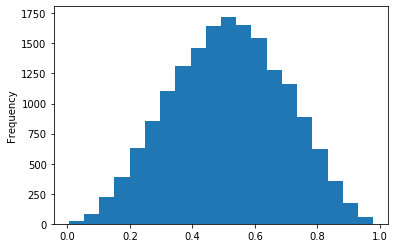

In [55]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(logReg.predict_proba(X_test_final)[:,1])
print_predict_proba_hist(series)

### 2. Градиентный бустинг

In [56]:
gbc = GradientBoostingClassifier(n_estimators=20, random_state=42)  # n_estimators - число деревьев
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.6373

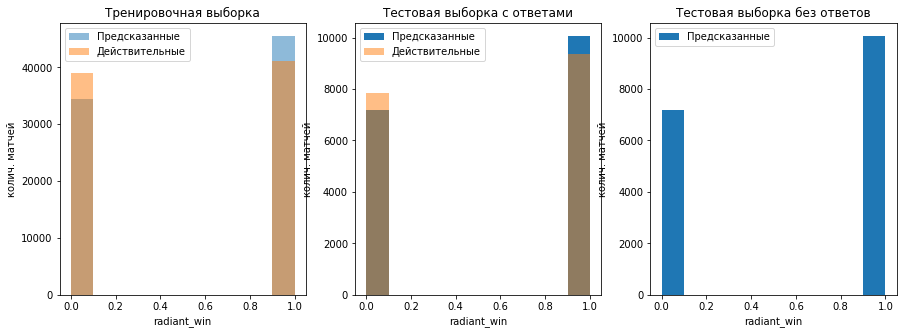

In [59]:
# сравнительные гистограммы работы модели
print_compare_hists(gbc, X_train, y_train, X_test, y_test, X_test_final)

count    17230.000000
mean         0.515848
std          0.071177
min          0.321362
25%          0.463443
50%          0.516704
75%          0.568138
max          0.708776
dtype: float64


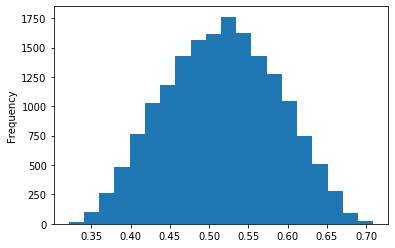

In [62]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(gbc.predict_proba(X_test)[:,1])
print_predict_proba_hist(series)

count    17177.000000
mean         0.514269
std          0.069863
min          0.321362
25%          0.463898
50%          0.514835
75%          0.564955
max          0.708150
dtype: float64


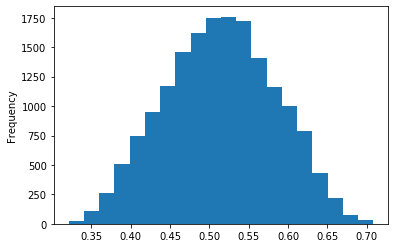

In [63]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(gbc.predict_proba(X_test_final)[:,1])
print_predict_proba_hist(series)

### 3. Случайный лес

In [64]:
randForest = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=0)
randForest.fit(X_train, y_train)
randForest.score(X_train, y_train)

0.91785

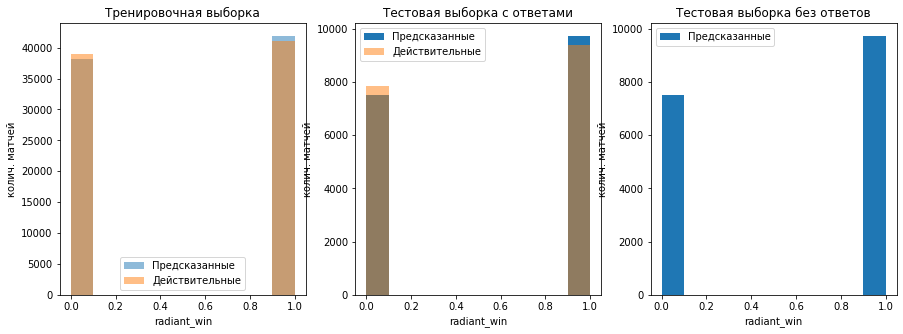

In [65]:
# сравнительные гистограммы работы модели
print_compare_hists(randForest, X_train, y_train, X_test, y_test, X_test_final)

In [67]:
randForest.feature_importances_[randForest.feature_importances_ > 0.02]

array([0.02678563, 0.02844599, 0.02498648, 0.02550556, 0.02644633,
       0.02740385, 0.02784399, 0.02501477, 0.02736163, 0.02690311])

count    17230.000000
mean         0.522763
std          0.124186
min          0.130949
25%          0.434774
50%          0.521700
75%          0.612208
max          0.882673
dtype: float64


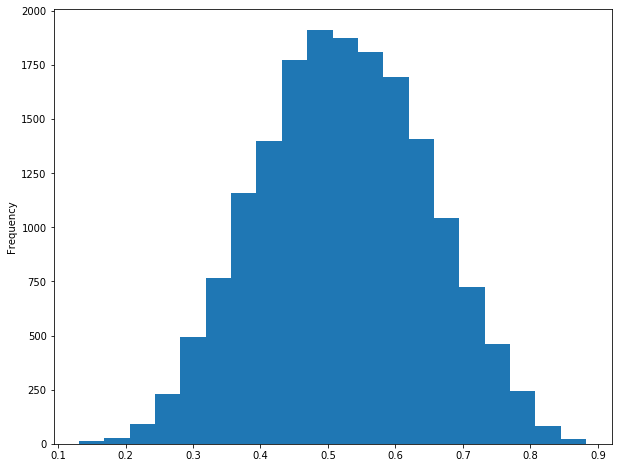

In [94]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(randForest.predict_proba(X_test)[:,1])
print_predict_proba_hist(series)

count    17177.000000
mean         0.516020
std          0.124032
min          0.137446
25%          0.428941
50%          0.517585
75%          0.603509
max          0.892443
dtype: float64


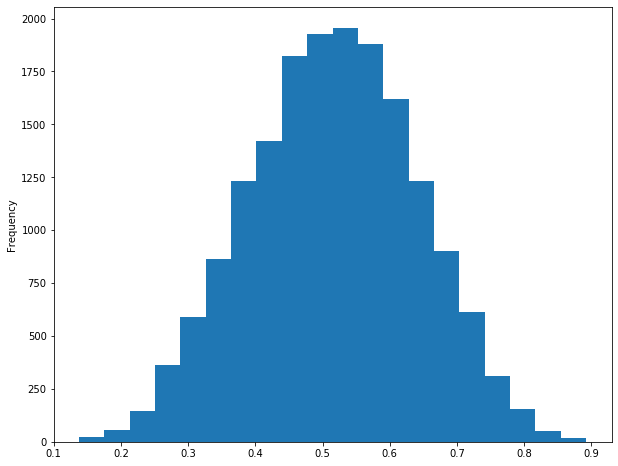

In [95]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(randForest.predict_proba(X_test_final)[:,1])
print_predict_proba_hist(series)

### 4. Метод Ближайших соседей

In [70]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.7046625

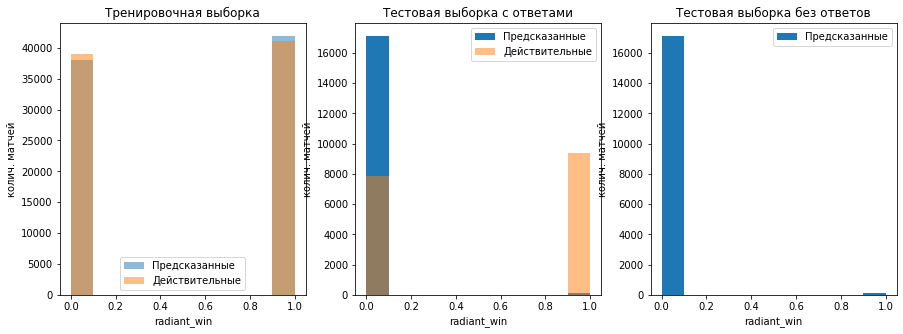

In [71]:
# сравнительные гистограммы работы модели
print_compare_hists(neigh, X_train, y_train, X_test, y_test, X_test_final)

count    17230.000000
mean         0.400221
std          0.024615
min          0.000000
25%          0.400000
50%          0.400000
75%          0.400000
max          0.800000
dtype: float64


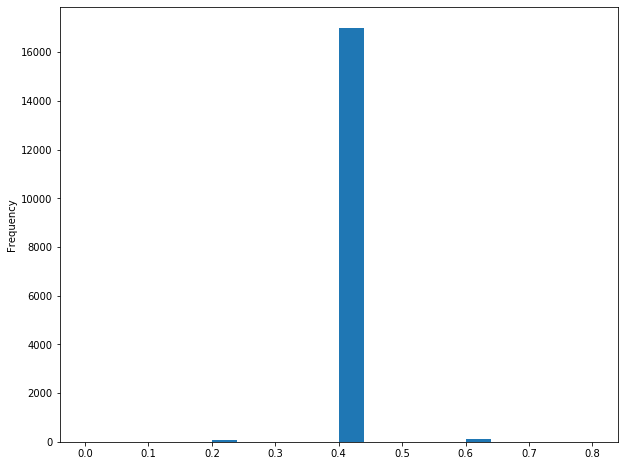

In [96]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(neigh.predict_proba(X_test)[:,1])
print_predict_proba_hist(series)

count    17177.000000
mean         0.493334
std          0.209537
min          0.000000
25%          0.400000
50%          0.400000
75%          0.600000
max          1.000000
dtype: float64


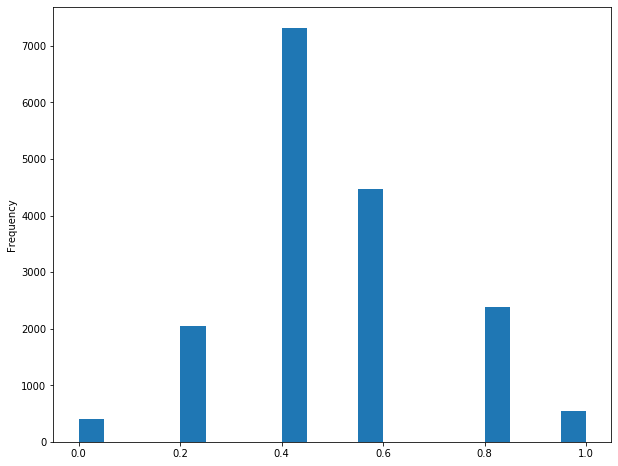

In [97]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(neigh.predict_proba(X_test_final)[:,1])
print_predict_proba_hist(series)

### 5. Бэггинг

In [82]:
bg = BaggingClassifier(n_estimators=20, random_state=42) 
bg.fit(X_train, y_train)
bg.score(X_train, y_train)

0.9984125

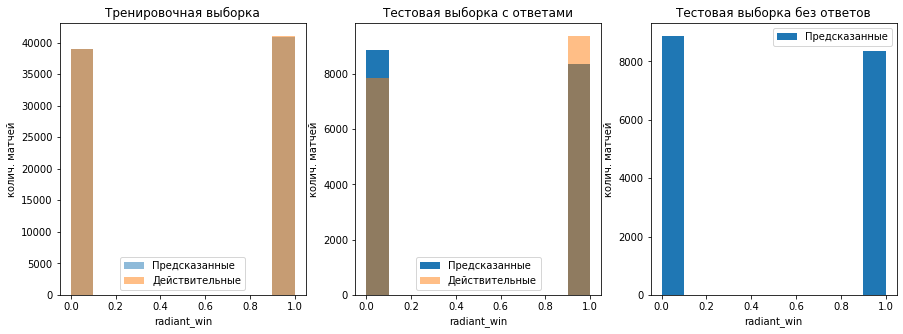

In [84]:
# сравнительные гистограммы работы модели
print_compare_hists(bg, X_train, y_train, X_test, y_test, X_test_final)

count    17230.000000
mean         0.518558
std          0.156861
min          0.050000
25%          0.400000
50%          0.500000
75%          0.650000
max          1.000000
dtype: float64


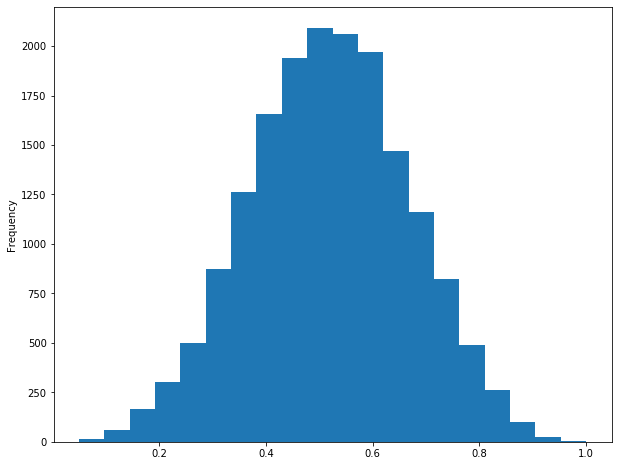

In [98]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(bg.predict_proba(X_test)[:,1])
print_predict_proba_hist(series)

count    17177.000000
mean         0.511044
std          0.166397
min          0.000000
25%          0.400000
50%          0.500000
75%          0.650000
max          1.000000
dtype: float64


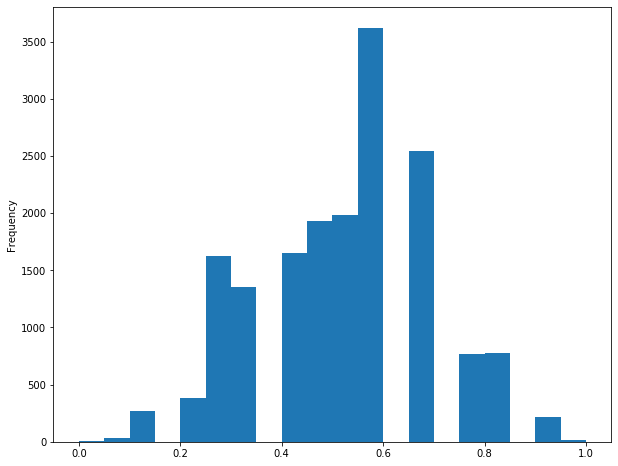

In [116]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(bg.predict_proba(X_test_final)[:,1])
print_predict_proba_hist(series)

### 5. Нейросеть

In [90]:
nn = Sequential() # - модель поседовательная, которая состоит из полного стека слоев
# Полностью подключенные слои.
nn.add(Dense(8, activation='softmax', input_dim=X_train.shape[1]))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(16, activation='sigmoid'))
# Выходной слой
nn.add(Dense(1, activation='sigmoid'))
# Компилирует сеть
nn.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])
print(nn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 760       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
#  Обучение сети
hist = nn.fit(X_train[:80000], y_train[:80000], validation_data=(X_train[80000:], y_train[80000:]), epochs=5, batch_size=50)

Train on 80000 samples, validate on 0 samples
Epoch 1/5
80000/80000 [==============================] - 2s 24us/step - loss: 0.6950 - acc: 0.5104
Epoch 2/5
80000/80000 [==============================] - 1s 18us/step - loss: 0.6931 - acc: 0.5106
Epoch 3/5
80000/80000 [==============================] - 1s 18us/step - loss: 0.6931 - acc: 0.5099
Epoch 4/5
80000/80000 [==============================] - 1s 17us/step - loss: 0.6931 - acc: 0.5100
Epoch 5/5
80000/80000 [==============================] - 1s 18us/step - loss: 0.6930 - acc: 0.5105


In [107]:
# точность
score = nn.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (score[1] * 100))

Accuracy: 51.30%


count    17230.000000
mean         0.503277
std          0.000079
min          0.503198
25%          0.503198
50%          0.503198
75%          0.503198
max          0.503198
dtype: float64


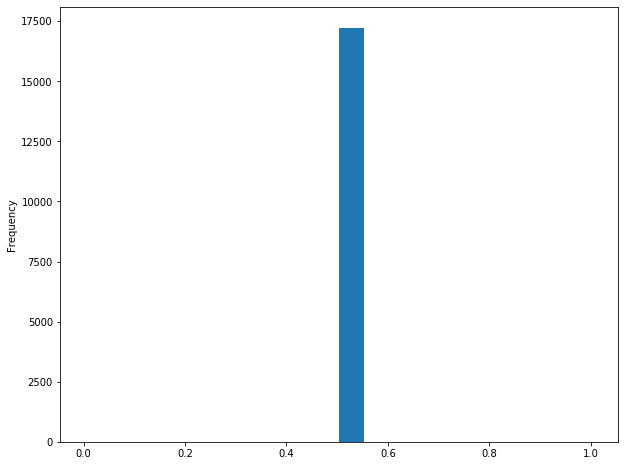

In [124]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test
series = pd.Series(nn.predict_proba(X_test)[:,0])
print_predict_proba_hist(series)

count    17177.000000
mean         0.503278
std          0.000080
min          0.503198
25%          0.503198
50%          0.503198
75%          0.503198
max          0.503198
dtype: float64


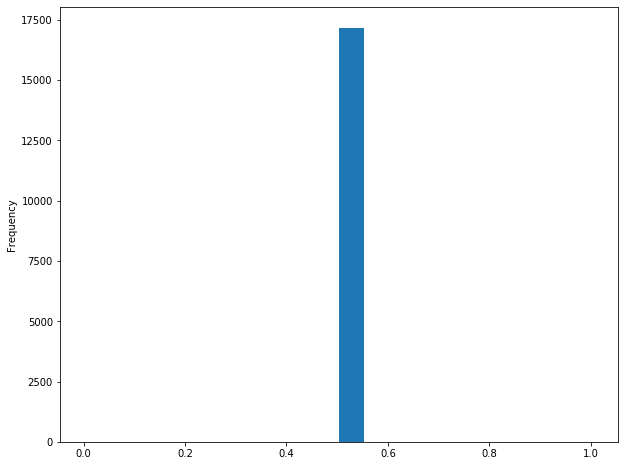

In [125]:
# гистограмма вероятностей "степени уверенности" ДЛЯ X_test_final
series = pd.Series(nn.predict_proba(X_test_final)[:,0])
print_predict_proba_hist(series)